In [1]:
import scraper_eod as s
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import mibian
import time
import indicator_backtest as i
m = s.StockMongo()

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)


In [2]:
o = i.Options("FANG")

In [3]:
o.returns.head()

strike_date    return  rel_risk  probability  volatility  is_won  \
0  2022-07-15       NaN       NaN        0.408    0.567676   False   
1  2022-07-15       NaN       NaN        0.544    0.567676   False   
2  2022-07-15 -0.385714  0.264151        0.680    0.567676    True   
3  2022-07-15       NaN       NaN        0.816    0.567676   False   
4  2022-07-15       NaN       NaN        0.952    0.567676   False   

   days_to_strike       iv      iv2  is_lost        vix  
0             NaN  56.7676  56.7676    False  30.959999  
1             NaN  56.7676  56.7676    False  30.959999  
2            48.0  56.7676  56.7676     True  30.959999  
3             NaN  56.7676  56.7676    False  30.959999  
4             NaN  56.7676  56.7676    False  30.959999

In [4]:
r = o.returns.dropna(subset=['rel_risk'])
r = r[(r['rel_risk']>0)&(r['rel_risk']<1)&(r['return']>0)&(r['return']<3)]

<AxesSubplot:xlabel='rel_risk', ylabel='return'>

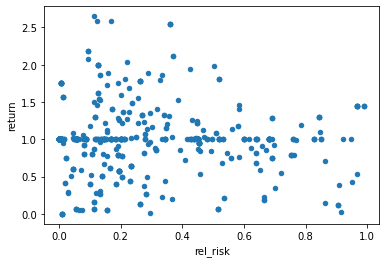

In [5]:
r.plot.scatter(x='rel_risk', y='return')

In [20]:
t = r[['return', 'rel_risk', 'iv', 'probability', 'days_to_strike']]

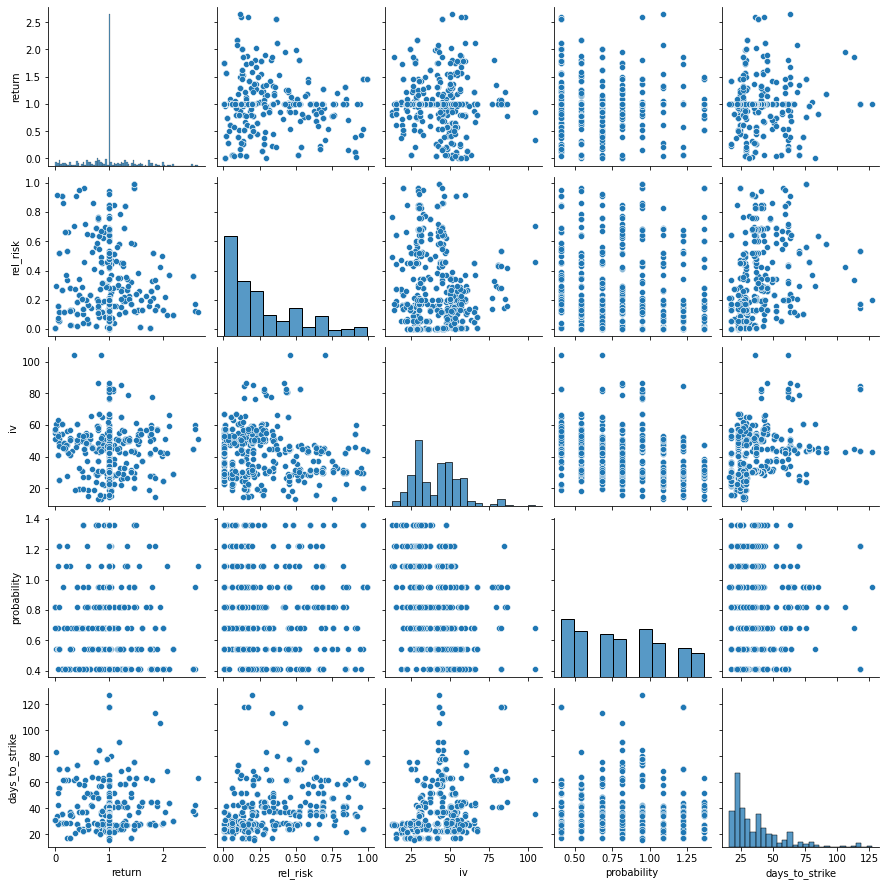

In [21]:
sns.pairplot(data=t)

In [7]:
stats = o.regression()

C:\Users\ander\Documents\yahooScraper\indicator_backtest.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selection['sqr_rel_risk'] = np.log(selection['rel_risk'])


In [8]:
stats[0]

{'y0': 0.9656133300571765,
 'sqr_rel_risk': 0.04015531209844633,
 'probability': 0.11450871764348311,
 'iv': -0.00013451527020591839,
 'vix': 0.004708308487122814,
 'days_to_strike': -0.0023021267011560237,
 'ticker': 'FANG',
 'date': datetime.datetime(2022, 12, 25, 0, 0)}

In [11]:
from sklearn.linear_model import LinearRegression
self = o
linear_regressor = LinearRegression()
selection = self.returns[(self.returns['rel_risk']>0)&(self.returns['rel_risk']<1)&(self.returns['return']>0)&(self.returns['return']<3)]
selection['sqr_rel_risk'] = np.log(selection['rel_risk'])
y = selection['return']
x = selection[['sqr_rel_risk', 'probability', 'iv', 'vix', 'days_to_strike']]
linear_regressor.fit(x, y)
        

C:\Users\ander\AppData\Local\Temp/ipykernel_22704/1867400287.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selection['sqr_rel_risk'] = np.log(selection['rel_risk'])


LinearRegression()

In [13]:
return_dict = {
            'y0': linear_regressor.intercept_,
            'sqr_rel_risk': linear_regressor.coef_[0],
            'probability': linear_regressor.coef_[1], 
            'iv': linear_regressor.coef_[2], 
            'vix': linear_regressor.coef_[3], 
            'days_to_strike': linear_regressor.coef_[4],
            'ticker': self.ticker,
        }

In [15]:
return_dict

{'y0': 1.1926509280469593,
 'sqr_rel_risk': -0.009333962547497781,
 'probability': -0.07517814696893531,
 'iv': -0.0023567188003906676,
 'vix': -0.0033527506226230753,
 'days_to_strike': 0.0005940722634266565,
 'ticker': 'FANG'}

In [16]:
linear_regressor.score(x, y)

0.0064240679304368165

In [17]:
stats[1].score(x, y)

-0.030875227813921713